Text(0.5, 1.0, '테스트')

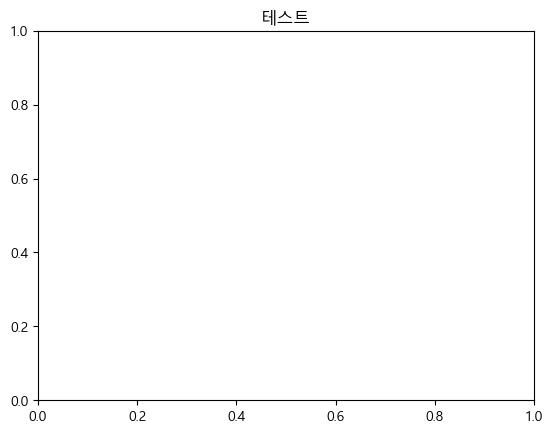

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from pyvis.network import Network
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns

from matplotlib import rc
%matplotlib inline
from matplotlib import font_manager
plt.style.use('default')
f_path = "C:/windows/Fonts/malgun.ttf"
ko_font = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')
plt.title('테스트')

In [2]:
# Data Load
# kr_sec = pd.read_csv('./kr_sec_180.csv', index_col = 0)
# kr_price = pd.read_csv('./kr_price_180.csv', index_col = 0)
# kr_earn = pd.read_csv('./kr_earning_180.csv', index_col = 0)


kr_sec = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH/1028/kr_sec_180.csv', index_col = 0)
kr_price = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH/1028/kr_price_180.csv', index_col = 0)
kr_earn = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH/1028/kr_earning_180.csv', index_col = 0)

kr_earn = kr_earn.iloc[:,[0] + list(range(9,17))]

In [3]:
#국내 월별 누적수익률 분류 리스트 생성

#Jan
kr_earn_Jan = kr_earn.loc[:,['종목','Jan_earning']]

Jan_kr_High = kr_earn_Jan[kr_earn_Jan['Jan_earning']=='High']['종목'].to_list()
Jan_kr_Middle = kr_earn_Jan[kr_earn_Jan['Jan_earning']=='middle']['종목'].to_list()
Jan_kr_Low = kr_earn_Jan[kr_earn_Jan['Jan_earning']=='Low']['종목'].to_list()

#Feb
kr_earn_Feb = kr_earn.loc[:,['종목','Feb_earning']]

Feb_kr_High = kr_earn_Feb[kr_earn_Feb['Feb_earning']=='High']['종목'].to_list()
Feb_kr_Middle = kr_earn_Feb[kr_earn_Feb['Feb_earning']=='middle']['종목'].to_list()
Feb_kr_Low = kr_earn_Feb[kr_earn_Feb['Feb_earning']=='Low']['종목'].to_list()

#Mar
kr_earn_Mar = kr_earn.loc[:,['종목','Mar_earning']]

Mar_kr_High = kr_earn_Mar[kr_earn_Mar['Mar_earning']=='High']['종목'].to_list()
Mar_kr_Middle = kr_earn_Mar[kr_earn_Mar['Mar_earning']=='middle']['종목'].to_list()
Mar_kr_Low = kr_earn_Mar[kr_earn_Mar['Mar_earning']=='Low']['종목'].to_list()

#Apr
kr_earn_Apr = kr_earn.loc[:,['종목','Apr_earning']]

Apr_kr_High = kr_earn_Apr[kr_earn_Apr['Apr_earning']=='High']['종목'].to_list()
Apr_kr_Middle = kr_earn_Apr[kr_earn_Apr['Apr_earning']=='middle']['종목'].to_list()
Apr_kr_Low = kr_earn_Apr[kr_earn_Apr['Apr_earning']=='Low']['종목'].to_list()

#May
kr_earn_May = kr_earn.loc[:,['종목','May_earning']]

May_kr_High = kr_earn_May[kr_earn_May['May_earning']=='High']['종목'].to_list()
May_kr_Middle = kr_earn_May[kr_earn_May['May_earning']=='middle']['종목'].to_list()
May_kr_Low = kr_earn_May[kr_earn_May['May_earning']=='Low']['종목'].to_list()

#Jun
kr_earn_Jun = kr_earn.loc[:,['종목','Jun_earning']]

Jun_kr_High = kr_earn_Jun[kr_earn_Jun['Jun_earning']=='High']['종목'].to_list()
Jun_kr_Middle = kr_earn_Jun[kr_earn_Jun['Jun_earning']=='middle']['종목'].to_list()
Jun_kr_Low = kr_earn_Jun[kr_earn_Jun['Jun_earning']=='Low']['종목'].to_list()

#Jul
kr_earn_Jul = kr_earn.loc[:,['종목','Jul_earning']]

Jul_kr_High = kr_earn_Jul[kr_earn_Jul['Jul_earning']=='High']['종목'].to_list()
Jul_kr_Middle = kr_earn_Jul[kr_earn_Jul['Jul_earning']=='middle']['종목'].to_list()
Jul_kr_Low = kr_earn_Jul[kr_earn_Jul['Jul_earning']=='Low']['종목'].to_list()

#Aug
kr_earn_Aug = kr_earn.loc[:,['종목','Aug_earning']]

Aug_kr_High = kr_earn_Aug[kr_earn_Aug['Aug_earning']=='High']['종목'].to_list()
Aug_kr_Middle = kr_earn_Aug[kr_earn_Aug['Aug_earning']=='middle']['종목'].to_list()
Aug_kr_Low = kr_earn_Aug[kr_earn_Aug['Aug_earning']=='Low']['종목'].to_list()

In [4]:
def generate_network(df):
    #상관행렬 생성
    stock_per = df.pct_change()
    stock_per = stock_per.iloc[1:,:]
    stock_cor = stock_per.dropna(axis = 1).corr(method = 'pearson')

    # convert matrix to list of edges and rename the columns
    edges = stock_cor.stack().reset_index()
    edges.columns = ["종목_1", "종목_2", "correlation"]

    # remove self correlations
    edges = edges.loc[edges["종목_1"] != edges["종목_2"]].copy()

    # 임계값(+-0.4) 이하 제거
    threshold = 0.4

    # 기본 무방향 그래프 생성
    Gx = nx.from_pandas_edgelist(edges, "종목_1", "종목_2", edge_attr=["correlation"])

    # list to store edges to remove
    remove = []
    # loop through edges in Gx and find correlations which are below the threshold
    for 종목_1, 종목_2 in Gx.edges():
        corr = Gx[종목_1][종목_2]["correlation"]
        # add to remove node list if abs(corr) < threshold
        if abs(corr) < threshold:
            remove.append((종목_1, 종목_2))

    # remove edges contained in the remove list
    Gx.remove_edges_from(remove)
    print(str(len(remove)) + " edges removed")
    return Gx

15273 edges removed


In [ ]:
Gx = generate_network(kr_price)

In [5]:
#노드 사이즈 지정
degree_dict = dict(nx.degree(Gx))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx.add_node(stock_list[i], size = nsize[i]*1.1)

# 1월

In [6]:
Gx.add_nodes_from(Jan_kr_High, color = 'blue')
Gx.add_nodes_from(Jan_kr_Middle, color = 'white')
Gx.add_nodes_from(Jan_kr_Low, color = 'red')


net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Jan_kr.html')

All_Sector_MonthlyRate_Jan_kr.html


In [7]:
net.write_html('All_Sector_MonthlyRate_Jan_kr.html')

# 2월

In [8]:
Gx.add_nodes_from(Feb_kr_High, color = 'blue')
Gx.add_nodes_from(Feb_kr_Middle, color = 'white')
Gx.add_nodes_from(Feb_kr_Low, color = 'red')

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Feb_kr.html')

All_Sector_MonthlyRate_Feb_kr.html


In [9]:
net.write_html('All_Sector_MonthlyRate_Feb_kr.html')

# 3월

In [10]:
Gx.add_nodes_from(Mar_kr_High, color = 'blue')
Gx.add_nodes_from(Mar_kr_Middle, color = 'white')
Gx.add_nodes_from(Mar_kr_Low, color = 'red')

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Mar_kr.html')

All_Sector_MonthlyRate_Mar_kr.html


In [11]:
net.write_html('All_Sector_MonthlyRate_Mar_kr.html')

# 4월

In [12]:
Gx.add_nodes_from(Apr_kr_High, color = 'blue')
Gx.add_nodes_from(Apr_kr_Middle, color = 'white')
Gx.add_nodes_from(Apr_kr_Low, color = 'red')

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Apr_kr.html')

All_Sector_MonthlyRate_Apr_kr.html


In [13]:
net.write_html('All_Sector_MonthlyRate_Apr_kr.html')

# 5월

In [14]:
Gx.add_nodes_from(May_kr_High, color = 'blue')
Gx.add_nodes_from(May_kr_Middle, color = 'white')
Gx.add_nodes_from(May_kr_Low, color = 'red')


net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_May_kr.html')

All_Sector_MonthlyRate_May_kr.html


In [15]:
net.write_html('All_Sector_MonthlyRate_May_kr.html')

# 6월

In [16]:
Gx.add_nodes_from(Jun_kr_High, color = 'blue')
Gx.add_nodes_from(Jun_kr_Middle, color = 'white')
Gx.add_nodes_from(Jun_kr_Low, color = 'red')

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Jun_kr.html')

All_Sector_MonthlyRate_Jun_kr.html


In [17]:
net.write_html('All_Sector_MonthlyRate_Jun_kr.html')

# 7월

In [18]:
Gx.add_nodes_from(Jul_kr_High, color = 'blue')
Gx.add_nodes_from(Jul_kr_Middle, color = 'white')
Gx.add_nodes_from(Jul_kr_Low, color = 'red')

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Jul_kr.html')

All_Sector_MonthlyRate_Jul_kr.html


In [19]:
net.write_html('All_Sector_MonthlyRate_Jul_kr.html')

# 8월

In [20]:
Gx.add_nodes_from(Aug_kr_High, color = 'blue')
Gx.add_nodes_from(Aug_kr_Middle, color = 'white')
Gx.add_nodes_from(Aug_kr_Low, color = 'red')

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx)
net.show('All_Sector_MonthlyRate_Aug_kr.html')

All_Sector_MonthlyRate_Aug_kr.html


In [21]:
net.write_html('All_Sector_MonthlyRate_Aug_kr.html')